In [1]:
from fastai.vision import *
#from fastai.conv_learner import *

from pathlib import Path
import json
import fastai.datasets
import numpy
import matplotlib

In [2]:
path = Path('E:\Data\Processed\DOTACOCO')

In [49]:
metadata_file = path/'dota2coco_train.json'

In [50]:
train_json = json.load((metadata_file).open())

In [51]:
train_json.keys()

dict_keys(['images', 'categories', 'annotations'])

In [52]:
train_json['annotations'][0]

{'area': 352.0,
 'category_id': 9,
 'segmentation': [[2238.0, 1791.0],
  [2254.0, 1791.0],
  [2254.0, 1813.0],
  [2238.0, 1813.0]],
 'iscrowd': 0,
 'bbox': [2238.0, 1791.0, 16.0, 22.0],
 'image_id': 1,
 'id': 1}

In [53]:
train_json['categories']

[{'id': 1, 'name': 'plane', 'supercategory': 'plane'},
 {'id': 2, 'name': 'ship', 'supercategory': 'ship'},
 {'id': 3, 'name': 'storage-tank', 'supercategory': 'storage-tank'},
 {'id': 4, 'name': 'baseball-diamond', 'supercategory': 'baseball-diamond'},
 {'id': 5, 'name': 'tennis-court', 'supercategory': 'tennis-court'},
 {'id': 6, 'name': 'basketball-court', 'supercategory': 'basketball-court'},
 {'id': 7,
  'name': 'ground-track-field',
  'supercategory': 'ground-track-field'},
 {'id': 8, 'name': 'harbor', 'supercategory': 'harbor'},
 {'id': 9, 'name': 'bridge', 'supercategory': 'bridge'},
 {'id': 10, 'name': 'small-vehicle', 'supercategory': 'small-vehicle'},
 {'id': 11, 'name': 'large-vehicle', 'supercategory': 'large-vehicle'},
 {'id': 12, 'name': 'helicopter', 'supercategory': 'helicopter'},
 {'id': 13, 'name': 'roundabout', 'supercategory': 'roundabout'},
 {'id': 14, 'name': 'soccer-ball-field', 'supercategory': 'soccer-ball-field'},
 {'id': 15, 'name': 'swimming-pool', 'superca

In [54]:
categories = {cat['id'] for cat in train_json['categories']}

In [55]:
categories

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [56]:
path

WindowsPath('E:/Data/Processed/DOTACOCO')

In [57]:
train_ims, train_gt = get_annotations(metadata_file)
val_ims, val_gt = get_annotations(path/'dota2coco_val.json')

In [58]:
train_ims[:5]

['P0000.png', 'P0001.png', 'P0002.png', 'P0005.png', 'P0008.png']

In [59]:
#train_gt[:5]

We want to turn these into BBox objects to make transformations easier

In [60]:
ims_path = Path('E:\Data\Raw\DOTA\\train\images\part1\images')

In [61]:
train_ims

['P0000.png',
 'P0001.png',
 'P0002.png',
 'P0005.png',
 'P0008.png',
 'P0010.png',
 'P0011.png',
 'P0012.png',
 'P0013.png',
 'P0018.png',
 'P0020.png',
 'P0021.png',
 'P0022.png',
 'P0023.png',
 'P0025.png',
 'P0029.png',
 'P0030.png',
 'P0032.png',
 'P0036.png',
 'P0038.png',
 'P0039.png',
 'P0041.png',
 'P0042.png',
 'P0044.png',
 'P0049.png',
 'P0050.png',
 'P0052.png',
 'P0054.png',
 'P0058.png',
 'P0061.png',
 'P0063.png',
 'P0064.png',
 'P0065.png',
 'P0066.png',
 'P0067.png',
 'P0068.png',
 'P0070.png',
 'P0071.png',
 'P0074.png',
 'P0076.png',
 'P0078.png',
 'P0082.png',
 'P0083.png',
 'P0085.png',
 'P0087.png',
 'P0091.png',
 'P0093.png',
 'P0094.png',
 'P0095.png',
 'P0096.png',
 'P0098.png',
 'P0099.png',
 'P0100.png',
 'P0103.png',
 'P0109.png',
 'P0111.png',
 'P0113.png',
 'P0116.png',
 'P0119.png',
 'P0122.png',
 'P0124.png',
 'P0126.png',
 'P0129.png',
 'P0133.png',
 'P0136.png',
 'P0139.png',
 'P0140.png',
 'P0141.png',
 'P0142.png',
 'P0144.png',
 'P0147.png',
 'P014

In [62]:
img = open_image(ims_path/train_ims[0])

In [63]:
#path

In [64]:
idx = 0

['bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'small-vehicle',
 'plane',
 'small-vehicle',
 'bridge',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'bridge',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 

In [66]:
classes = train_gt[idx][1]
labels = range(len(classes))

In [67]:
labels

range(0, 323)

['bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'small-vehicle',
 'plane',
 'small-vehicle',
 'bridge',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'bridge',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'small-vehicle',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 'bridge',
 

In [69]:
bbox = ImageBBox.create(*img.size, train_gt[idx][0], labels=labels, classes=classes)

In [70]:
bbox

ImageBBox (5502, 3875)

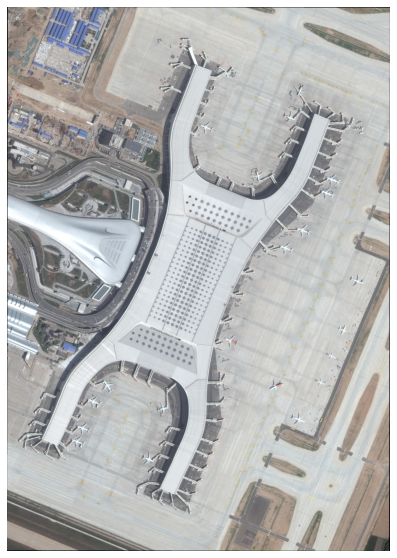

In [71]:
img.show(figsize=(10,10))

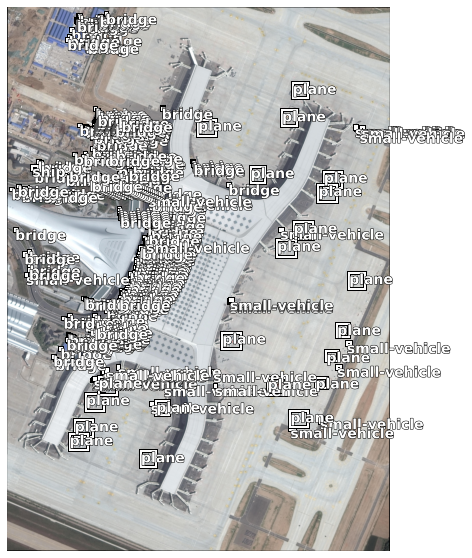

In [72]:
img.show(figsize=(10,10), y=bbox)

In [73]:
path

WindowsPath('E:/Data/Processed/DOTACOCO')

In [74]:
idx = 1

In [75]:
img = open_image(ims_path/train_ims[idx])

In [76]:
classes = train_gt[idx][1]
labels = range(len(classes)) # could this be out inside the function? Or is it reversed sometimes?

[[364.0, 330.0, 402.0, 432.0],
 [1536.0, 252.0, 1568.0, 287.0],
 [4078.0, 312.0, 4110.0, 602.0],
 [3934.0, 555.0, 3988.0, 670.0],
 [3891.0, 580.0, 3920.0, 677.0],
 [3719.0, 629.0, 3744.0, 686.0],
 [3043.0, 633.0, 3071.0, 705.0],
 [2581.0, 670.0, 2607.0, 736.0],
 [1640.0, 964.0, 1683.0, 1069.0],
 [1608.0, 1001.0, 1638.0, 1069.0],
 [864.0, 983.0, 910.0, 1006.0],
 [3883.0, 312.0, 3947.0, 673.0],
 [3685.0, 359.0, 3724.0, 695.0],
 [3070.0, 397.0, 3095.0, 805.0],
 [2889.0, 416.0, 2916.0, 825.0],
 [2592.0, 437.0, 2629.0, 757.0],
 [1864.0, 593.0, 2017.0, 1003.0],
 [1776.0, 618.0, 1895.0, 1028.0],
 [1540.0, 670.0, 1659.0, 1060.0],
 [4104.0, 528.0, 4144.0, 620.0],
 [4240.0, 285.0, 4266.0, 657.0],
 [4260.0, 452.0, 4280.0, 494.0],
 [3093.0, 708.0, 3124.0, 819.0],
 [1429.0, 301.0, 1459.0, 331.0],
 [876.0, 784.0, 964.0, 1020.0],
 [5520.0, 91.0, 5542.0, 130.0],
 [1083.0, 389.0, 1097.0, 424.0],
 [1062.0, 385.0, 1076.0, 419.0],
 [2148.0, 477.0, 2252.0, 966.0],
 [3044.0, 727.0, 3076.0, 806.0],
 [3188.0,

In [78]:
bbox = ImageBBox.create(*img.size, train_gt[idx][0], labels, classes)

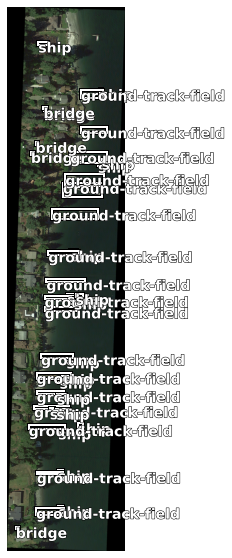

In [79]:
img.show(figsize=(10,10), y=bbox)

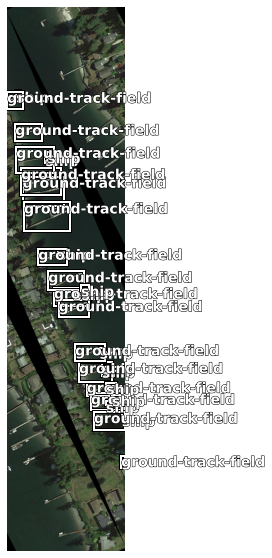

In [80]:
rotation = 25
img = img.rotate(rotation)
bbox = bbox.rotate(rotation)
img.show(figsize=(10, 10), y=bbox)

In [81]:
# Interesting - as you rotate an image the boxes necessarily become larger and less close to the object.

Use the data block to load images into a DataBunch

In [82]:
all_ims = train_ims + val_ims
all_gt = train_gt + val_gt

In [83]:
im_gt_dict = dict(zip(all_ims, all_gt))

Look at an example

In [84]:
image_path = Path(r'E:\Data\Raw\DOTA\train\images\part1\images') # need that RRRRRR

In [85]:
# obj is a Pathlib object
get_gt = lambda obj: im_gt_dict[obj.name]

In [86]:
src = ObjectItemList.from_folder(image_path)
src

ObjectItemList (469 items)
Image (3, 5502, 3875),Image (3, 5774, 1252),Image (3, 2086, 2557),Image (3, 977, 884),Image (3, 1235, 1143)
Path: E:\Data\Raw\DOTA\train\images\part1\images

In [87]:
src = src.split_by_files(val_ims)
src

C:\Users\Julius\Documents\GitHub\fastai-pythonic\fastai\data_block.py:740: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning."""


ItemLists;

Train: ObjectItemList (469 items)
Image (3, 5502, 3875),Image (3, 5774, 1252),Image (3, 2086, 2557),Image (3, 977, 884),Image (3, 1235, 1143)
Path: E:\Data\Raw\DOTA\train\images\part1\images;

Valid: ObjectItemList (0 items)

Path: E:\Data\Raw\DOTA\train\images\part1\images;

Test: None

In [88]:
im_size = 64
batch_size = 16

In [89]:
get_gt

<function __main__.<lambda>(obj)>

In [90]:
src = src.label_from_func(get_gt)
src

[WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0000.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0001.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0002.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0005.png') ...
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0899.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0900.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0905.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0906.png')]
[WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0000.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0001.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0002.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0005.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0008.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0010.png'), WindowsPath('E:/Data/Raw/DOT

LabelLists;

Train: LabelList (469 items)
x: ObjectItemList
Image (3, 5502, 3875),Image (3, 5774, 1252),Image (3, 2086, 2557),Image (3, 977, 884),Image (3, 1235, 1143)
y: ObjectCategoryList
ImageBBox (5502, 3875),ImageBBox (5774, 1252),ImageBBox (2086, 2557),ImageBBox (977, 884),ImageBBox (1235, 1143)
Path: E:\Data\Raw\DOTA\train\images\part1\images;

Valid: LabelList (0 items)
x: ObjectItemList

y: ObjectCategoryList

Path: E:\Data\Raw\DOTA\train\images\part1\images;

Test: None

In [91]:
def get_data(batch_size, im_size):
    src = ObjectItemList.from_folder(image_path)
    src = src.split_by_files(val_ims)
    src = src.label_from_func(get_gt)
    # get_transforms is imported
    src = src.transform(get_transforms(), size=im_size, tfm_y=True)
    # bb_pad_collate is imported
    return src.databunch(path=path, bs=batch_size, collate_fn=bb_pad_collate)

In [92]:
data = get_data(16, 64)

C:\Users\Julius\Documents\GitHub\fastai-pythonic\fastai\data_block.py:740: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning."""


[WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0000.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0001.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0002.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0005.png') ...
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0899.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0900.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0905.png')
 WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0906.png')]
[WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0000.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0001.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0002.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0005.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0008.png'), WindowsPath('E:/Data/Raw/DOTA/train/images/part1/images/P0010.png'), WindowsPath('E:/Data/Raw/DOT

C:\Users\Julius\anaconda3\envs\pt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Julius\anaconda3\envs\pt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

C:\Users\Julius\anaconda3\envs\pt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
C:\Users\Julius\anaconda3\envs\pt\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default 

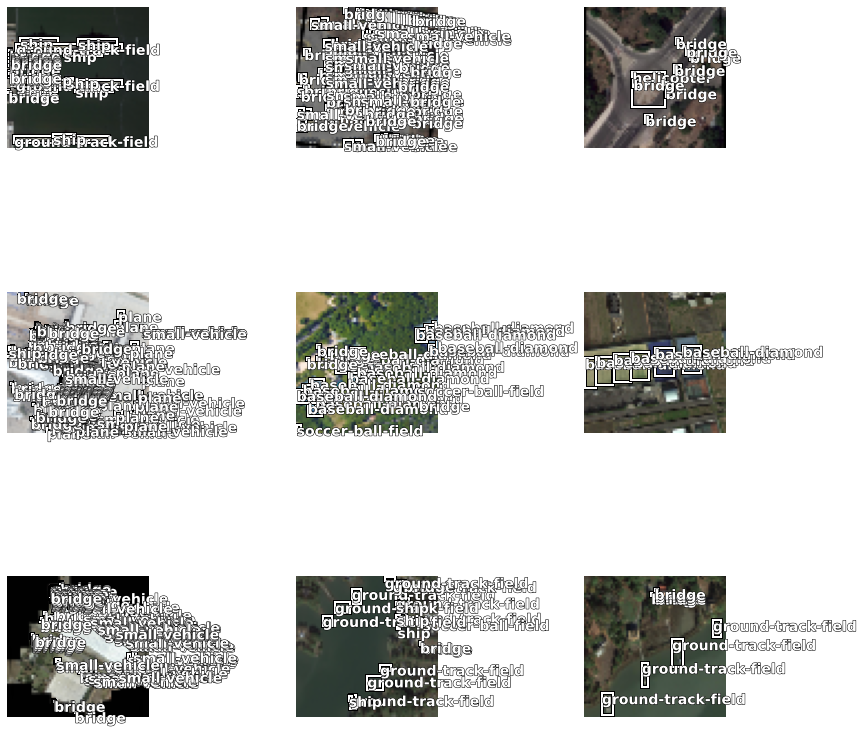

In [93]:

data.show_batch(rows=3)

Now we make a RetinaNet, which is based on a FPN

Each P layer goes through two different heads. Each head has 4 conv layers. 1 for regression 1 for classification.

We'll reuse some convenience functions from UNet

In [94]:
from fastai.vision.models.unet import _get_sfs_idxs, model_sizes, hook_outputs

In [95]:
class LateralUpsampleMerge(nn.Module):
    """Merge upsampled with lateral connection"""
    def __init__(self, ch, ch_lat, hook):
        super().__init__()
        self.hook = hook
        self.conv_lat = conv2d(ch_lat, ch, ks=1, bias=True)
        
    def forward(self, x):
        return self.conv_lat(self.hook.stored) + F.interpolate(x, self.hook.stored.shape[-2:], mode='nearest')

In [96]:
class RetinaNet(nn.Module):
    "Implements RetinaNet from https://arxiv.org/abs/1708.02002"
    def __init__(self, encoder:nn.Module, n_classes, final_bias=0., chs=256, n_anchors=9, flatten=True):
        super().__init__()
        self.n_classes,self.flatten = n_classes,flatten
        imsize = (256,256)
        sfs_szs = model_sizes(encoder, size=imsize)
        sfs_idxs = list(reversed(_get_sfs_idxs(sfs_szs)))
        self.sfs = hook_outputs([encoder[i] for i in sfs_idxs])
        self.encoder = encoder
        self.c5top5 = conv2d(sfs_szs[-1][1], chs, ks=1, bias=True)
        self.c5top6 = conv2d(sfs_szs[-1][1], chs, stride=2, bias=True)
        self.p6top7 = nn.Sequential(nn.ReLU(), conv2d(chs, chs, stride=2, bias=True))
        self.merges = nn.ModuleList([LateralUpsampleMerge(chs, sfs_szs[idx][1], hook) 
                                     for idx,hook in zip(sfs_idxs[-2:-4:-1], self.sfs[-2:-4:-1])])
        self.smoothers = nn.ModuleList([conv2d(chs, chs, 3, bias=True) for _ in range(3)])
        self.classifier = self._head_subnet(n_classes, n_anchors, final_bias, chs=chs)
        self.box_regressor = self._head_subnet(4, n_anchors, 0., chs=chs)
        
    def _head_subnet(self, n_classes, n_anchors, final_bias=0., n_conv=4, chs=256):
        "Helper function to create one of the subnet for regression/classification."
        layers = [conv_layer(chs, chs, bias=True, norm_type=None) for _ in range(n_conv)]
        layers += [conv2d(chs, n_classes * n_anchors, bias=True)]
        layers[-1].bias.data.zero_().add_(final_bias)
        layers[-1].weight.data.fill_(0)
        return nn.Sequential(*layers)
    
    def _apply_transpose(self, func, p_states, n_classes):
        #Final result of the classifier/regressor is bs * (k * n_anchors) * h * w
        #We make it bs * h * w * n_anchors * k then flatten in bs * -1 * k so we can contenate
        #all the results in bs * anchors * k (the non flatten version is there for debugging only)
        if not self.flatten: 
            sizes = [[p.size(0), p.size(2), p.size(3)] for p in p_states]
            return [func(p).permute(0,2,3,1).view(*sz,-1,n_classes) for p,sz in zip(p_states,sizes)]
        else:
            return torch.cat([func(p).permute(0,2,3,1).contiguous().view(p.size(0),-1,n_classes) for p in p_states],1)
    
    def forward(self, x):
        c5 = self.encoder(x)
        p_states = [self.c5top5(c5.clone()), self.c5top6(c5)]
        p_states.append(self.p6top7(p_states[-1]))
        for merge in self.merges: p_states = [merge(p_states[0])] + p_states
        for i, smooth in enumerate(self.smoothers[:3]):
            p_states[i] = smooth(p_states[i])
        return [self._apply_transpose(self.classifier, p_states, self.n_classes), 
                self._apply_transpose(self.box_regressor, p_states, 4),
                [[p.size(2), p.size(3)] for p in p_states]]
    
    def __del__(self):
        if hasattr(self, "sfs"): self.sfs.remove()

RetinaNet has 32 * 32 + 16 * 16 + 8 * 8 +4 * 4 + 2 * 2 = 1364 possible detections per anchor. If we do 9 anchors for per location, that's 12276 possible detections. (why not just three anchors - don't need to resize them)

If we look at the 4 * 4 feature map, it will have 16 locations like so

In [97]:
torch.arange(0,16).long().view(4,4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [98]:
def create_grid(size):
    "Create a grid of a given `size`."
    H, W = size if is_tuple(size) else (size,size)
    grid = FloatTensor(H, W, 2)
    linear_points = torch.linspace(-1+1/W, 1-1/W, W) if W > 1 else tensor([0.])
    grid[:, :, 1] = torch.ger(torch.ones(H), linear_points).expand_as(grid[:, :, 0])
    linear_points = torch.linspace(-1+1/H, 1-1/H, H) if H > 1 else tensor([0.])
    grid[:, :, 0] = torch.ger(linear_points, torch.ones(W)).expand_as(grid[:, :, 1])
    return grid.view(-1,2)

In [99]:

def show_anchors(ancs, size):
    _,ax = plt.subplots(1,1, figsize=(5,5))
    ax.set_xticks(np.linspace(-1,1, size[1]+1))
    ax.set_yticks(np.linspace(-1,1, size[0]+1))
    ax.grid()
    ax.scatter(ancs[:,1], ancs[:,0]) #y is first
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlim(-1,1)
    ax.set_ylim(1,-1) #-1 is top, 1 is bottom
    for i, (x, y) in enumerate(zip(ancs[:, 1], ancs[:, 0])): ax.annotate(i, xy = (x,y))

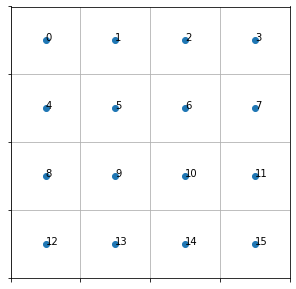

In [100]:

size = (4,4)
show_anchors(create_grid(size), size)

In [101]:
def create_anchors(sizes, ratios, scales, flatten=True):
    "Create anchor of `sizes`, `ratios` and `scales`."
    aspects = [[[s*math.sqrt(r), s*math.sqrt(1/r)] for s in scales] for r in ratios]
    aspects = torch.tensor(aspects).view(-1,2)
    anchors = []
    for h,w in sizes:
        #4 here to have the anchors overlap.
        sized_aspects = 4 * (aspects * torch.tensor([2/h,2/w])).unsqueeze(0)
        base_grid = create_grid((h,w)).unsqueeze(1)
        n,a = base_grid.size(0),aspects.size(0)
        ancs = torch.cat([base_grid.expand(n,a,2), sized_aspects.expand(n,a,2)], 2)
        anchors.append(ancs.view(h,w,a,4))
    return torch.cat([anc.view(-1,4) for anc in anchors],0) if flatten else anchors

In [102]:

ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)] 
#Paper used [1,2**(1/3), 2**(2/3)] but a bigger size (600) too, so the largest feature map gave anchors that cover less of the image.
sizes = [(2**i,2**i) for i in range(5)]
sizes.reverse() #Predictions come in the order of the smallest feature map to the biggest
anchors = create_anchors(sizes, ratios, scales)

In [103]:
anchors.size()

torch.Size([3069, 4])

In [104]:
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler

def get_cmap(N):
    color_norm  = mcolors.Normalize(vmin=0, vmax=N-1)
    return cmx.ScalarMappable(norm=color_norm, cmap='Set3').to_rgba

num_color = 12
cmap = get_cmap(num_color)
color_list = [cmap(float(x)) for x in range(num_color)]

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)

In [105]:

def show_boxes(boxes):
    "Show the `boxes` (size by 4)"
    _, ax = plt.subplots(1,1, figsize=(5,5))
    ax.set_xlim(-1,1)
    ax.set_ylim(1,-1)
    for i, bbox in enumerate(boxes):
        bb = bbox.numpy()
        rect = [bb[1]-bb[3]/2, bb[0]-bb[2]/2, bb[3], bb[2]]
        draw_rect(ax, rect, color=color_list[i%num_color])
        draw_text(ax, [bb[1]-bb[3]/2,bb[0]-bb[2]/2], str(i), color=color_list[i%num_color])

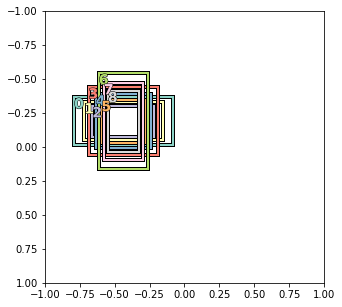

In [106]:
show_boxes(anchors[900:909])

In [107]:

def activ_to_bbox(acts, anchors, flatten=True):
    "Extrapolate bounding boxes on anchors from the model activations."
    if flatten:
        acts.mul_(acts.new_tensor([[0.1, 0.1, 0.2, 0.2]])) #Can't remember where those scales come from, but they help regularize
        centers = anchors[...,2:] * acts[...,:2] + anchors[...,:2]
        sizes = anchors[...,2:] * torch.exp(acts[...,:2])
        return torch.cat([centers, sizes], -1)
    else: return [activ_to_bbox(act,anc) for act,anc in zip(acts, anchors)]
    return res

In [108]:
size=(3,4)
anchors = create_grid(size)
anchors = torch.cat([anchors, torch.tensor([2/size[0],2/size[1]]).expand_as(anchors)], 1)
activations = torch.randn(size[0]*size[1], 4) * 0.1
bboxes = activ_to_bbox(activations, anchors)

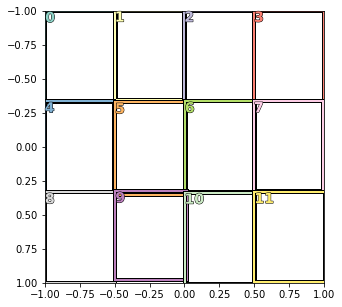

In [109]:
show_boxes(bboxes)

In [110]:

def cthw2tlbr(boxes):
    "Convert center/size format `boxes` to top/left bottom/right corners."
    top_left = boxes[:,:2] - boxes[:,2:]/2
    bot_right = boxes[:,:2] + boxes[:,2:]/2
    return torch.cat([top_left, bot_right], 1)

In [111]:
def intersection(anchors, targets):
    "Compute the sizes of the intersections of `anchors` by `targets`."
    ancs, tgts = cthw2tlbr(anchors), cthw2tlbr(targets)
    a, t = ancs.size(0), tgts.size(0)
    ancs, tgts = ancs.unsqueeze(1).expand(a,t,4), tgts.unsqueeze(0).expand(a,t,4)
    top_left_i = torch.max(ancs[...,:2], tgts[...,:2])
    bot_right_i = torch.min(ancs[...,2:], tgts[...,2:])
    sizes = torch.clamp(bot_right_i - top_left_i, min=0) 
    return sizes[...,0] * sizes[...,1]

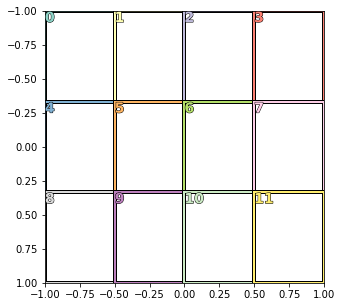

In [112]:
show_boxes(anchors)

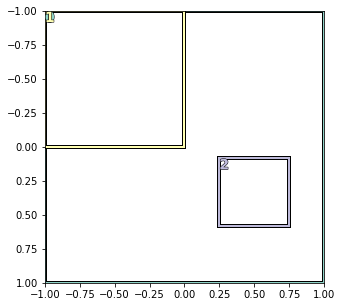

In [113]:
targets = torch.tensor([[0.,0.,2.,2.], [-0.5,-0.5,1.,1.], [1/3,0.5,0.5,0.5]])
show_boxes(targets)

In [114]:
intersection(anchors, targets)

tensor([[0.3333, 0.3333, 0.0000],
        [0.3333, 0.3333, 0.0000],
        [0.3333, 0.0000, 0.0000],
        [0.3333, 0.0000, 0.0000],
        [0.3333, 0.1667, 0.0000],
        [0.3333, 0.1667, 0.0000],
        [0.3333, 0.0000, 0.0625],
        [0.3333, 0.0000, 0.0625],
        [0.3333, 0.0000, 0.0000],
        [0.3333, 0.0000, 0.0000],
        [0.3333, 0.0000, 0.0625],
        [0.3333, 0.0000, 0.0625]])

In [115]:

def IoU_values(anchors, targets):
    "Compute the IoU values of `anchors` by `targets`."
    inter = intersection(anchors, targets)
    anc_sz, tgt_sz = anchors[:,2] * anchors[:,3], targets[:,2] * targets[:,3]
    union = anc_sz.unsqueeze(1) + tgt_sz.unsqueeze(0) - inter
    return inter/(union+1e-8)


In [116]:
IoU_values(anchors, targets)

tensor([[0.0833, 0.3333, 0.0000],
        [0.0833, 0.3333, 0.0000],
        [0.0833, 0.0000, 0.0000],
        [0.0833, 0.0000, 0.0000],
        [0.0833, 0.1429, 0.0000],
        [0.0833, 0.1429, 0.0000],
        [0.0833, 0.0000, 0.1200],
        [0.0833, 0.0000, 0.1200],
        [0.0833, 0.0000, 0.0000],
        [0.0833, 0.0000, 0.0000],
        [0.0833, 0.0000, 0.1200],
        [0.0833, 0.0000, 0.1200]])

In [117]:
def match_anchors(anchors, targets, match_thr=0.5, bkg_thr=0.4):
    "Match `anchors` to targets. -1 is match to background, -2 is ignore."
    matches = anchors.new(anchors.size(0)).zero_().long() - 2
    if targets.numel() == 0: return matches
    ious = IoU_values(anchors, targets)
    vals,idxs = torch.max(ious,1)
    matches[vals < bkg_thr] = -1
    matches[vals > match_thr] = idxs[vals > match_thr]
    #Overwrite matches with each target getting the anchor that has the max IoU.
    #vals,idxs = torch.max(ious,0)
    #If idxs contains repetition, this doesn't bug and only the last is considered.
    #matches[idxs] = targets.new_tensor(list(range(targets.size(0)))).long()
    return matches

In [118]:
match_anchors(anchors, targets)


tensor([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [119]:
size=(3,4)
anchors = create_grid(size)
anchors = torch.cat([anchors, torch.tensor([2/size[0],2/size[1]]).expand_as(anchors)], 1)
activations = 0.1 * torch.randn(size[0]*size[1], 4)
bboxes = activ_to_bbox(activations, anchors)
match_anchors(anchors,bboxes)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [120]:
anchors = create_grid((2,2))
anchors = torch.cat([anchors, torch.tensor([1.,1.]).expand_as(anchors)], 1)
targets = anchors.clone()
anchors = torch.cat([anchors, torch.tensor([[-0.5,0.,1.,1.8]])], 0)
match_anchors(anchors,targets)

tensor([ 0,  1,  2,  3, -2])

In [121]:
def tlbr2cthw(boxes):
    "Convert top/left bottom/right format `boxes` to center/size corners."
    center = (boxes[:,:2] + boxes[:,2:])/2
    sizes = boxes[:,2:] - boxes[:,:2]
    return torch.cat([center, sizes], 1)

In [122]:
def bbox_to_activ(bboxes, anchors, flatten=True):
    "Return the target of the model on `anchors` for the `bboxes`."
    if flatten:
        t_centers = (bboxes[...,:2] - anchors[...,:2]) / anchors[...,2:] 
        t_sizes = torch.log(bboxes[...,2:] / anchors[...,2:] + 1e-8) 
        return torch.cat([t_centers, t_sizes], -1).div_(bboxes.new_tensor([[0.1, 0.1, 0.2, 0.2]]))
    else: return [activ_to_bbox(act,anc) for act,anc in zip(acts, anchors)]
    return res

In [123]:

def encode_class(idxs, n_classes):
    target = idxs.new_zeros(len(idxs), n_classes).float()
    mask = idxs != 0
    i1s = LongTensor(list(range(len(idxs))))
    target[i1s[mask],idxs[mask]-1] = 1
    return target

In [124]:
encode_class(LongTensor([1,2,0,1,3]),3)


tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.]])

In [125]:
class RetinaNetFocalLoss(nn.Module):
    def __init__(self, gamma:float=2., alpha:float=0.25,  pad_idx:int=0, scales:Collection[float]=None, 
                 ratios:Collection[float]=None, reg_loss:LossFunction=F.smooth_l1_loss):
        super().__init__()
        self.gamma,self.alpha,self.pad_idx,self.reg_loss = gamma,alpha,pad_idx,reg_loss
        self.scales = ifnone(scales, [1,2**(-1/3), 2**(-2/3)])
        self.ratios = ifnone(ratios, [1/2,1,2])
        
    def _change_anchors(self, sizes:Sizes) -> bool:
        if not hasattr(self, 'sizes'): return True
        for sz1, sz2 in zip(self.sizes, sizes):
            if sz1[0] != sz2[0] or sz1[1] != sz2[1]: return True
        return False
    
    def _create_anchors(self, sizes:Sizes, device:torch.device):
        self.sizes = sizes
        self.anchors = create_anchors(sizes, self.ratios, self.scales).to(device)
    
    def _unpad(self, bbox_tgt, clas_tgt):
        i = torch.min(torch.nonzero(clas_tgt-self.pad_idx))
        return tlbr2cthw(bbox_tgt[i:]), clas_tgt[i:]-1+self.pad_idx
    
    def _focal_loss(self, clas_pred, clas_tgt):
        encoded_tgt = encode_class(clas_tgt, clas_pred.size(1))
        ps = torch.sigmoid(clas_pred.detach())
        weights = encoded_tgt * (1-ps) + (1-encoded_tgt) * ps
        alphas = (1-encoded_tgt) * self.alpha + encoded_tgt * (1-self.alpha)
        weights.pow_(self.gamma).mul_(alphas)
        clas_loss = F.binary_cross_entropy_with_logits(clas_pred, encoded_tgt, weights, reduction='sum')
        return clas_loss
        
    def _one_loss(self, clas_pred, bbox_pred, clas_tgt, bbox_tgt):
        bbox_tgt, clas_tgt = self._unpad(bbox_tgt, clas_tgt)
        matches = match_anchors(self.anchors, bbox_tgt)
        bbox_mask = matches>=0
        if bbox_mask.sum() != 0:
            bbox_pred = bbox_pred[bbox_mask]
            bbox_tgt = bbox_tgt[matches[bbox_mask]]
            bb_loss = self.reg_loss(bbox_pred, bbox_to_activ(bbox_tgt, self.anchors[bbox_mask]))
        else: bb_loss = 0.
        matches.add_(1)
        clas_tgt = clas_tgt + 1
        clas_mask = matches>=0
        clas_pred = clas_pred[clas_mask]
        clas_tgt = torch.cat([clas_tgt.new_zeros(1).long(), clas_tgt])
        clas_tgt = clas_tgt[matches[clas_mask]]
        return bb_loss + self._focal_loss(clas_pred, clas_tgt)/torch.clamp(bbox_mask.sum(), min=1.)
    
    def forward(self, output, bbox_tgts, clas_tgts):
        clas_preds, bbox_preds, sizes = output
        if self._change_anchors(sizes): self._create_anchors(sizes, clas_preds.device)
        n_classes = clas_preds.size(2)
        return sum([self._one_loss(cp, bp, ct, bt)
                    for (cp, bp, ct, bt) in zip(clas_preds, bbox_preds, clas_tgts, bbox_tgts)])/clas_tgts.size(0)

In [126]:
class SigmaL1SmoothLoss(nn.Module):

    def forward(self, output, target):
        reg_diff = torch.abs(target - output)
        reg_loss = torch.where(torch.le(reg_diff, 1/9), 4.5 * torch.pow(reg_diff, 2), reg_diff - 1/18)
        return reg_loss.mean()

## Defining the Learner

In [127]:
ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)]
#scales = [1,2**(1/3), 2**(2/3)] for bigger size

In [128]:
encoder = create_body(models.resnet50, cut=-2)
model = RetinaNet(encoder, data.c, final_bias=-4)
crit = RetinaNetFocalLoss(scales=scales, ratios=ratios)
learn = Learner(data, model, loss_func=crit)

In [129]:
torch.sigmoid(tensor([-4.]))

tensor([0.0180])

In [130]:
def retina_net_split(model):
    groups = [list(model.encoder.children())[:6], list(model.encoder.children())[6:]]
    return groups + [list(model.children())[1:]]

In [131]:
learn = learn.split(retina_net_split)


In [132]:

learn.freeze()

In [133]:

learn.lr_find()

epoch,train_loss,valid_loss,time
0,2.840731,#na#,00:51


..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


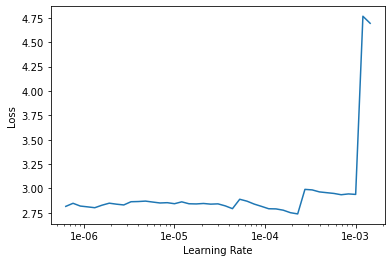

In [134]:

learn.recorder.plot(skip_end=5)

In [135]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,time
0,2.550619,#na#,00:42
1,2.450186,#na#,00:42
2,2.315749,#na#,00:42
3,2.180432,#na#,00:43
4,2.057570,#na#,00:43


In [136]:
learn.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [137]:
torch.cuda.empty_cache()